In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from scipy import stats
from plotly.offline import iplot
from plotly.subplots import make_subplots
import warnings
warnings.simplefilter(action="ignore")
sns.set_theme(palette=sns.color_palette("muted"),style="darkgrid")
from sklearn.model_selection import train_test_split,cross_val_score
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import RobustScaler,StandardScaler,MaxAbsScaler,MinMaxScaler
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV
import sklearn.metrics as metrics
import scikitplot as skplt
import category_encoders as ce

In [2]:
data=pd.read_csv("netflix_titles.csv",encoding= 'iso-8859-1')

In [3]:
data.sample(15)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
2303,s2304,TV Show,Warrior Nun,NaN,"Alba Baptista, Toya Turner, Lorena Andrea, Kri...",United States,"July 2, 2020",2020,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7108,s7109,Movie,ìµê°ì ì¬ ë¯¸ëí¹ê³µë : ìì ì íì,Young Jun Lee,"Um Sang-hyun, Yang Jeong-hwa, Jeon Tae-yeol, S...",NaN,"September 1, 2018",2018,TV-Y7,68 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5123,s5124,Movie,Pottersville,Seth Henrikson,"Michael Shannon, Judy Greer, Thomas Lennon, Ro...",United States,"December 15, 2017",2017,PG-13,86 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3289,s3290,Movie,Jeff Garlin: Our Man In Chicago,Christopher Storer,Jeff Garlin,United States,"November 12, 2019",2019,TV-MA,59 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5481,s5482,Movie,Chamatkar,Rajiv Mehra,"Shah Rukh Khan, Naseeruddin Shah, Urmila Maton...",India,"May 15, 2017",1992,TV-14,164 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6383,s6384,Movie,Bruno and Boots: The Wizzle War,Vivieno Caldinelli,"Jonny Gray, Callan Potter, Matt Baram, Carolin...",Canada,"July 1, 2017",2017,TV-PG,90 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7692,s7693,Movie,Pablo Escobar: Angel or Demon?,Jorge Granier,NaN,"Venezuela, Colombia","March 23, 2018",2007,NR,82 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6674,s6675,TV Show,El Chavo,NaN,"Roberto GÃ³mez BolaÃ±os, MarÃ­a Antonieta de l...",Mexico,"December 31, 2017",1979,TV-PG,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3459,s3460,Movie,Ready to Mingle,Luis Javier Henaine,"Cassandra Ciangherotti, Gabriela de la Garza, ...",Mexico,"October 2, 2019",2019,TV-MA,98 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3366,s3367,Movie,Little Miss Sumo,Matt Kay,Hiyori Kon,United Kingdom,"October 28, 2019",2018,TV-G,20 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.shape

(8809, 26)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       8809 non-null   object 
 1   type          8809 non-null   object 
 2   title         8809 non-null   object 
 3   director      6175 non-null   object 
 4   cast          7984 non-null   object 
 5   country       7978 non-null   object 
 6   date_added    8799 non-null   object 
 7   release_year  8809 non-null   int64  
 8   rating        8805 non-null   object 
 9   duration      8806 non-null   object 
 10  listed_in     8809 non-null   object 
 11  description   8809 non-null   object 
 12  Unnamed: 12   0 non-null      float64
 13  Unnamed: 13   0 non-null      float64
 14  Unnamed: 14   0 non-null      float64
 15  Unnamed: 15   0 non-null      float64
 16  Unnamed: 16   0 non-null      float64
 17  Unnamed: 17   0 non-null      float64
 18  Unnamed: 18   0 non-null    

In [6]:
data.duplicated().sum()

0

In [7]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [8]:
nan=data.isna().sum().sort_values()
nan

show_id            0
type               0
title              0
description        0
listed_in          0
release_year       0
duration           3
rating             4
date_added        10
cast             825
country          831
director        2634
Unnamed: 19     8809
Unnamed: 23     8809
Unnamed: 22     8809
Unnamed: 21     8809
Unnamed: 20     8809
Unnamed: 18     8809
Unnamed: 12     8809
Unnamed: 16     8809
Unnamed: 15     8809
Unnamed: 14     8809
Unnamed: 13     8809
Unnamed: 24     8809
Unnamed: 17     8809
Unnamed: 25     8809
dtype: int64

In [9]:
nan/len(data)*100

show_id           0.000000
type              0.000000
title             0.000000
description       0.000000
listed_in         0.000000
release_year      0.000000
duration          0.034056
rating            0.045408
date_added        0.113520
cast              9.365422
country           9.433534
director         29.901237
Unnamed: 19     100.000000
Unnamed: 23     100.000000
Unnamed: 22     100.000000
Unnamed: 21     100.000000
Unnamed: 20     100.000000
Unnamed: 18     100.000000
Unnamed: 12     100.000000
Unnamed: 16     100.000000
Unnamed: 15     100.000000
Unnamed: 14     100.000000
Unnamed: 13     100.000000
Unnamed: 24     100.000000
Unnamed: 17     100.000000
Unnamed: 25     100.000000
dtype: float64

In [10]:
data.drop(['Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
           'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
           'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
           'Unnamed: 24', 'Unnamed: 25'], axis=1, inplace=True)
print(data.columns)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [11]:
data.sample(8)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2777,s2778,TV Show,Unorthodox,NaN,"Shira Haas, Amit Rahav, Jeff Wilbusch, Alex Re...",Germany,"March 26, 2020",2020,TV-MA,1 Season,"International TV Shows, TV Dramas",A Hasidic Jewish woman in Brooklyn flees to Be...
7876,s7877,Movie,Roberto Saviano: Writing Under Police Protection,Pierfrancesco Diliberto,Pierfrancesco Diliberto,Italy,"May 1, 2018",2016,TV-14,45 min,"Documentaries, International Movies","Italian TV host Pif revisits Roberto Saviano, ..."
374,s375,Movie,Flower Girl,Michelle Bello,"Damilola Adegbite, Chris Attoh, Chuks Chukwuje...",Nigeria,"July 29, 2021",2013,TV-PG,94 min,"Comedies, International Movies, Romantic Movies",When a young florist who's long dreamed of her...
2582,s2583,Movie,Madagascar: Escape 2 Africa,"Eric Darnell, Tom McGrath","Ben Stiller, Chris Rock, David Schwimmer, Jada...",United States,"May 1, 2020",2008,PG,91 min,"Children & Family Movies, Comedies",A botched rescue strands Alex the lion and his...
4309,s4310,TV Show,Tidelands,NaN,"Charlotte Best, Elsa Pataky, Marco Pigossi, Aa...",Australia,"December 14, 2018",2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",Ex-con Cal McTeer's return to her hometown of ...
4608,s4609,TV Show,Three Wives One Husband,NaN,NaN,United Kingdom,"October 1, 2018",2018,TV-14,1 Season,"British TV Shows, International TV Shows, Real...",A film crew captures a year in the life of mod...
1433,s1434,Movie,100% Halal,Jastis Arimba,"Anisa Rahma, Ariyo Wahab, Anandito Dwis, Fitri...",Indonesia,"January 7, 2021",2020,TV-14,101 min,"Dramas, International Movies","After high school, a young woman marries the m..."
2838,s2839,TV Show,Ugly Delicious,NaN,"David Chang, Peter Meehan",United States,"March 6, 2020",2020,TV-MA,2 Seasons,Docuseries,All the flavor. None of the BS. Star chef Davi...


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8809 non-null   object
 1   type          8809 non-null   object
 2   title         8809 non-null   object
 3   director      6175 non-null   object
 4   cast          7984 non-null   object
 5   country       7978 non-null   object
 6   date_added    8799 non-null   object
 7   release_year  8809 non-null   int64 
 8   rating        8805 non-null   object
 9   duration      8806 non-null   object
 10  listed_in     8809 non-null   object
 11  description   8809 non-null   object
dtypes: int64(1), object(11)
memory usage: 826.0+ KB


In [13]:
nan=data.isna().sum().sort_values()
nan

show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
duration           3
rating             4
date_added        10
cast             825
country          831
director        2634
dtype: int64

In [14]:
nan/len(data)*100

show_id          0.000000
type             0.000000
title            0.000000
release_year     0.000000
listed_in        0.000000
description      0.000000
duration         0.034056
rating           0.045408
date_added       0.113520
cast             9.365422
country          9.433534
director        29.901237
dtype: float64

In [15]:
data["type"].unique()

array(['Movie', 'TV Show'], dtype=object)

In [16]:
data["director"].nunique()

4529

In [17]:
data["country"].nunique()

748

In [18]:
data["rating"].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR', 'A'], dtype=object)

In [22]:
data["listed_in"].unique()

array(['Documentaries', 'International TV Shows, TV Dramas, TV Mysteries',
       'Crime TV Shows, International TV Shows, TV Action & Adventure',
       'Docuseries, Reality TV',
       'International TV Shows, Romantic TV Shows, TV Comedies',
       'TV Dramas, TV Horror, TV Mysteries', 'Children & Family Movies',
       'Dramas, Independent Movies, International Movies',
       'British TV Shows, Reality TV', 'Comedies, Dramas',
       'Crime TV Shows, Docuseries, International TV Shows',
       'Dramas, International Movies',
       'Children & Family Movies, Comedies',
       'British TV Shows, Crime TV Shows, Docuseries',
       'TV Comedies, TV Dramas', 'Documentaries, International Movies',
       'Crime TV Shows, Spanish-Language TV Shows, TV Dramas',
       'Thrillers',
       'International TV Shows, Spanish-Language TV Shows, TV Action & Adventure',
       'International TV Shows, TV Action & Adventure, TV Dramas',
       'Comedies, International Movies',
       'Comedies, 

In [19]:
data["listed_in"] = data.loc[:,"listed_in"].str.replace("Musicals","Music")

In [60]:
data["Main_genre"] = data.loc[:,"listed_in"].str.extract("(^\w{1,20})")
data["Main_genre"] = data.loc[:,"Main_genre"].str.replace("Dramas","Drama")

In [61]:
data["Main_genre"] = data.loc[:,"Main_genre"].str.replace("Stand","Stand-Up")

In [62]:
data["Main_genre"].unique()

array(['Documentaries', 'International', 'Crime', 'Docuseries', 'TV',
       'Children', 'Drama', 'British', 'Comedies', 'Thrillers', 'Horror',
       'Kids', 'Action', 'Reality', 'Anime', 'Sci', 'Classic', 'Stand-Up',
       'Movies', 'Romantic', 'Cult', 'Independent', 'Spanish', 'Music',
       'LGBTQ', 'Sports'], dtype=object)

In [34]:
data["duration"].unique()

array(['90 min', '2 Seasons', '1 Season', '91 min', '125 min',
       '9 Seasons', '104 min', '127 min', '4 Seasons', '67 min', '94 min',
       '5 Seasons', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '3 Seasons', '110 min', '105 min',
       '96 min', '124 min', '116 min', '98 min', '23 min', '115 min',
       '122 min', '99 min', '88 min', '100 min', '6 Seasons', '102 min',
       '93 min', '95 min', '85 min', '83 min', '113 min', '13 min',
       '182 min', '48 min', '145 min', '87 min', '92 min', '80 min',
       '117 min', '128 min', '119 min', '143 min', '114 min', '118 min',
       '108 min', '63 min', '121 min', '142 min', '154 min', '120 min',
       '82 min', '109 min', '101 min', '86 min', '229 min', '76 min',
       '89 min', '156 min', '112 min', '107 min', '129 min', '135 min',
       '136 min', '165 min', '150 min', '133 min', '70 min', '84 min',
       '140 min', '78 min', '7 Seasons', '64 min', '59 min', '139 min',
    

In [35]:
from datetime import datetime

In [36]:
data['date_added'] = data['date_added'].str.strip()
data['date_added'] = pd.to_datetime(data['date_added'])

In [37]:
data.sample(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Main_genre
5760,s5761,Movie,The Siege of Jadotville,Richie Smyth,"Jamie Dornan, Guillaume Canet, Emmanuelle Seig...","Ireland, South Africa",2016-10-07,2016,TV-MA,108 min,"Action & Adventure, Dramas, International Movies","Besieged by overwhelming enemy forces, Irish s...",Action
6877,s6878,Movie,Good Luck,Tarek Abdel Moaty,"Ahmed Eid, May Kassab, Diaa El Merghany, Samy ...",Egypt,2019-06-21,2012,TV-MA,99 min,"Dramas, International Movies","Seeking an apartment to share with his wife, a...",Drama


In [38]:
#data["duration"] = data.loc[:,"duration"].str.replace("min","")

In [39]:
px.pie(data_frame=data,names='type',title='Distribution Type' )

In [95]:

top_10_country = data[data['type'] == 'Movie']['country'].value_counts().head(10)
top_10_country_df = top_10_country.reset_index()
top_10_country_df.columns = ['Country', 'Count']
fig = px.bar(
    top_10_country_df, 
    x='Country', 
    y='Count', 
    title='Top 10 Countries by Movies Produced',
    text='Count', 
    
)
fig.show()


In [94]:

top_10_country = data[data['type'] == 'TV Show']['country'].value_counts().head(10)
top_10_country_df = top_10_country.reset_index()
top_10_country_df.columns = ['Country', 'Count']
fig = px.bar(
    top_10_country_df, 
    x='Country', 
    y='Count', 
    title='Top 10 Countries by TV Produced',
    text='Count', 
   
)

fig.show()


In [40]:
country_count = data['country'].value_counts()
print(country_count)

country
United States                             2819
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                200
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 748, dtype: int64


In [57]:
top_10 = country_count.sort_values(ascending=False).head(10)
fig = px.bar(data_frame=top_10, text_auto=True, title='Top 10 Distribution Movies Country')
fig.show()

In [64]:
px.bar(data_frame=data.Main_genre.value_counts() ,text_auto=True, title='Distribution Type Movies' )

In [69]:
px.bar(data_frame=data.rating.value_counts() ,text_auto=True, title='Distribution Type Movies' )

In [76]:
top_10_director= data["director"].value_counts()
print(top_10_director)

director
Rajiv Chilaka                     19
RaÃºl Campos, Jan Suter           18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Yeon Sang-ho                       1
Name: count, Length: 4529, dtype: int64


In [79]:
top_10_director = top_10_director.sort_values(ascending=False).head(10)
px.bar(data_frame=top_10_director, text_auto=True, title='Top 10 Distribution Director Movies')

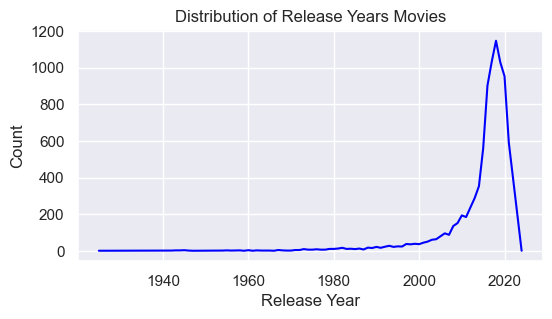

In [85]:
release_year_counts = data['release_year'].value_counts().sort_index()
plt.figure(figsize=(6, 3))
release_year_counts.plot(kind='line', color='blue')
plt.title('Distribution of Release Years Movies')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [100]:
content_type = data.groupby(['release_year', 'type']).size().unstack(fill_value=0)
content_type['Total'] = content_type['Movie'] + content_type['TV Show']
content_type = content_type.reset_index()
fig = px.line(
    content_type, 
    x='release_year', 
    y=['Movie', 'TV Show', 'Total'], 
    labels={'value': 'Count', 'variable': 'Content Type'}, 
    title='Movie, TV Shows and Total Released Each Year'
)
fig.show()
